__Imports__

In [1]:
from src.utils import read_data
from src.visualizations import *
from src.analysis import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

__Read the datasets__

In [3]:
df_worldwide_cases = read_data('Monkey_Pox_Cases_Worldwide_Cleaned.csv')
df_daily_cases = read_data('Daily_Country_Wise_Confirmed_Cases.csv')
df_detection_timeline = read_data('Worldwide_Case_Detection_Timeline_Cleaned.csv')

__Basic EDA__

In [4]:
df_worldwide_cases.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Country-Continent,lat,lon
0,England,3412.0,0.0,5.0,2.0,7.0,"('Unknown', 'Unknown')",25.029422,-77.361956
1,Portugal,908.0,0.0,0.0,0.0,34.0,"('PT', 'EU')",39.662165,-8.135352
2,Spain,7083.0,0.0,13.0,2.0,0.0,"('ES', 'EU')",39.326068,-4.837979
3,United States,24403.0,0.0,4.0,41.0,11.0,"('US', 'NA')",39.783730,-100.445882
4,Canada,1388.0,12.0,1.0,5.0,0.0,"('CA', 'NA')",61.066692,-107.991707


In [5]:
df_daily_cases.head()

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,2,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,29,0,0


In [6]:
df_detection_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,65546,65546,1245,2955,2425,195,328,449,338
unique,141,112,163,92,2,95,2,1,2
top,2022-08-22,United States,Toronto,20-69,M,genital ulcer lesions,N,Y,Y
freq,2063,24663,486,615,2405,30,199,449,249


In [7]:
df_detection_timeline.sort_values('Date_confirmation').head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


On seeing the above data, we can clearly say certain things about our data
* The most affected country is the United States
* The most affected city is Toronto, Canada
* Most number of people infected are male, but most infected people are not hospitalized
* The first cases were detected in Nigeria and Cameroon both in Africa
* The worst day in number of total cases detected was `22 August 2022`
* Monkey Pox is a disease that spreads direct contact of lesions and bodily fluids, contact with contaminated materials and respiratory droplets through prolonged face to face contact unlike Covid-19

In [8]:
df_us = df_detection_timeline[df_detection_timeline['Country']=='United States']
df_us.groupby('City').size().reset_index(name='Count').sort_values('Count', ascending=False).head()

,City,Count
16,San Francisco,36
3,Chicago,7
13,Nashville,3
0,Anchorage,2
10,Kansas City,2


Even though the US has a lot of cases, the city data is very sparse for it. The most affected city in the US is San Francisco.

__Visualization and Analysis__

1. Let's first take a look at the spread of the MonkeyPox disease in various parts of the world

__North America__

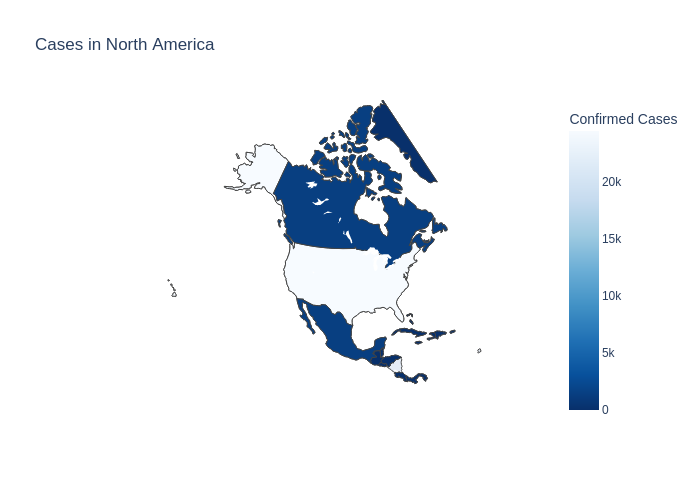

In [9]:
fig = cases_on_map(df_worldwide_cases, region="north america")
fig.show("png")

__South America__

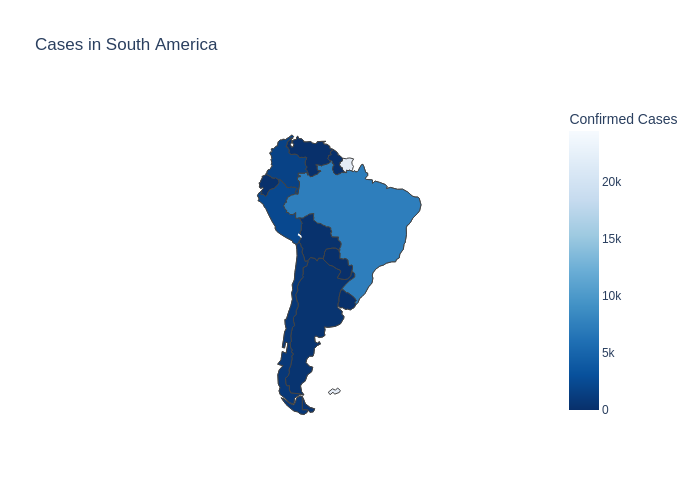

In [10]:
fig = cases_on_map(df_worldwide_cases, region="south america")
fig.show("png")

__Europe__

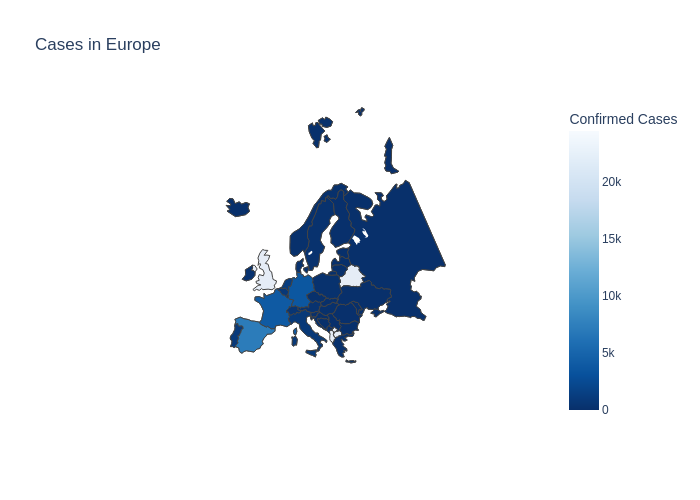

In [11]:
fig = cases_on_map(df_worldwide_cases, region="europe")
fig.show("png")

__Africa__

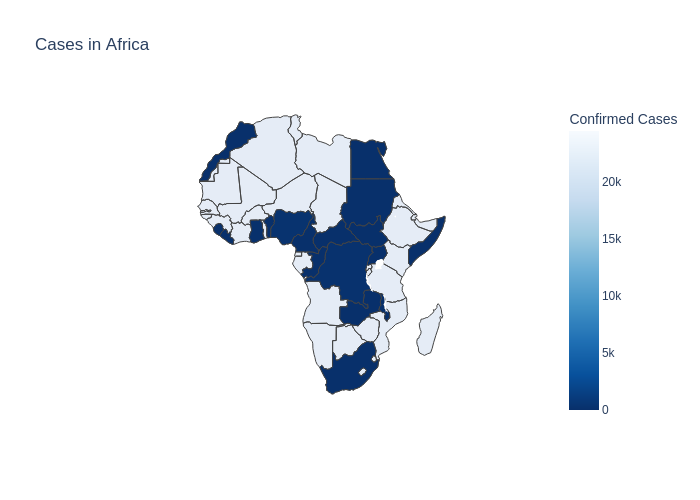

In [12]:
fig = cases_on_map(df_worldwide_cases, region="africa")
fig.show("png")

__Asia__

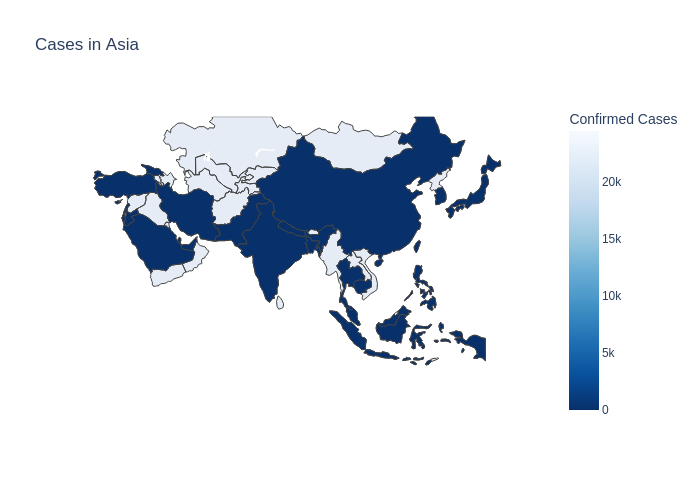

In [13]:
fig = cases_on_map(df_worldwide_cases, region="asia")
fig.show("png")

2. Now, let's see the timeline of cases growth

__Growth of confirmed cases__

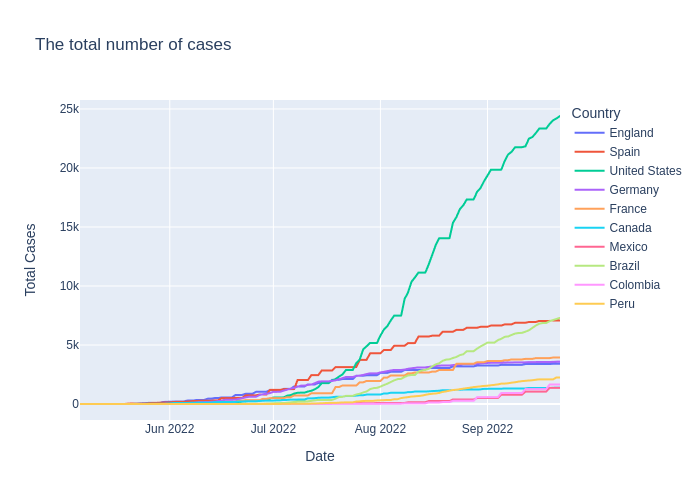

In [14]:
fig = case_trends(df_worldwide_cases, df_daily_cases)
fig.show("png")

According to the CDC, the group who is at the highest risk of getting infected are men who have sex with other men, people who identify as gay, transgender, bisexual and non-binary. However, anyone who has direct contact run the risk of infection. The increase in the cases in the US can be attributed to US being a society more acceptable of people with different sexual orientations and also due to larger volumne of tests performed and having a larger population.

__Daily Change in Confirmed Cases (Aug 2022 and beyond)__

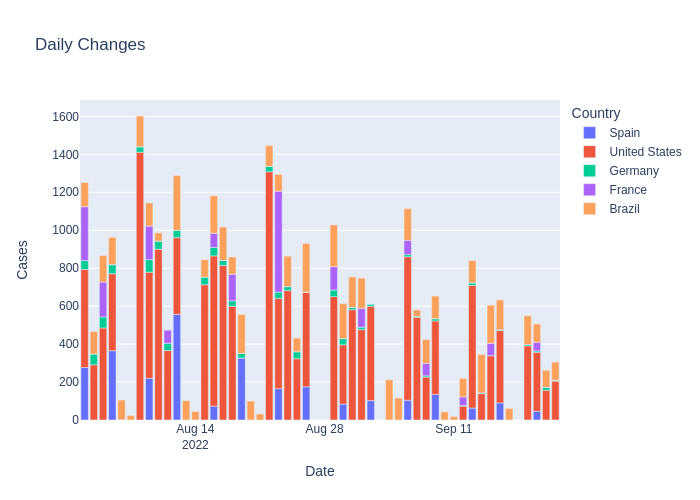

In [15]:
fig = daily_changes(df_worldwide_cases,df_daily_cases)
fig.show("png")

Even though the worst date in terms of the recorded cases was `22 August` worldwide, the top 5 countries have reached their peak on `8 August`. This uptrend later was mostly due to increased infections in Central and South America.

In [16]:
df = df_detection_timeline[df_detection_timeline['Date_confirmation']=='2022-08-22']
df.groupby('Country').size().reset_index(name='Count').sort_values('Count', ascending=False).head(10)

,Country,Count
21,United States,1308
7,England,141
13,Mexico,134
2,Brazil,109
5,Colombia,109
4,Chile,63
15,Peru,60
1,Belgium,47
8,Germany,29
20,Switzerland,17


3. Cities Affected

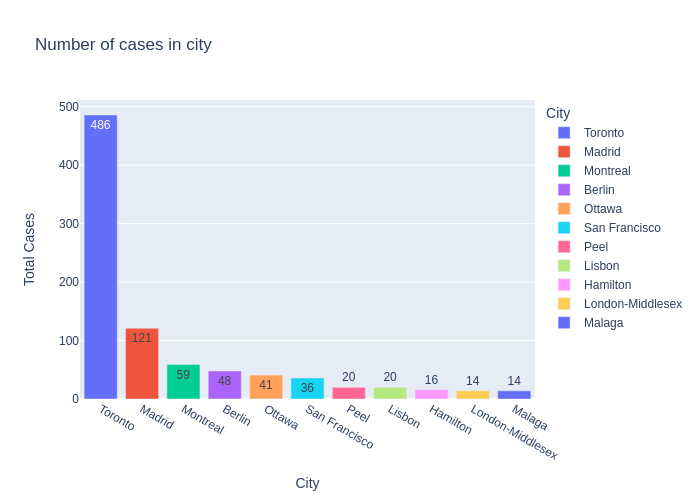

In [17]:
fig = cases_cities(df_detection_timeline)
fig.show("png")

4. Number of suspected cases

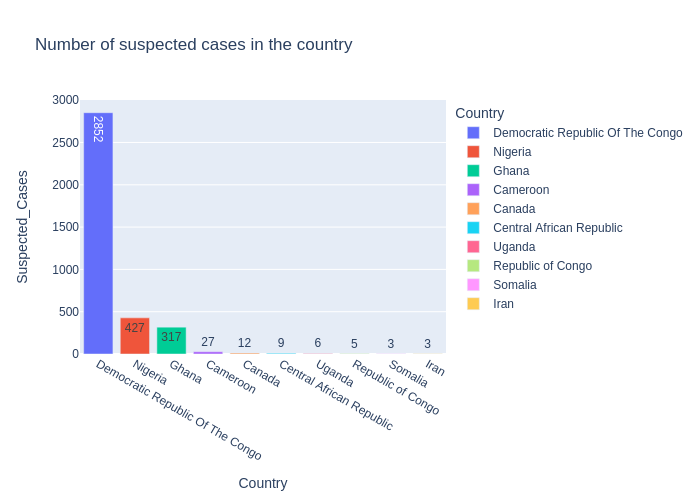

In [18]:
fig = suspected_cases_bar(df_worldwide_cases)
fig.show("png")

According to the most recent data available from the CDC [here](https://www.cdc.gov/poxvirus/monkeypox/response/2022/index.html), the number of cases in the US have substantially decreased, which is reflected by the fact the number of suspected cases in the US is very small, and the outbreak is approaching its peak in Africa

5. Travel History and Hospitalizations

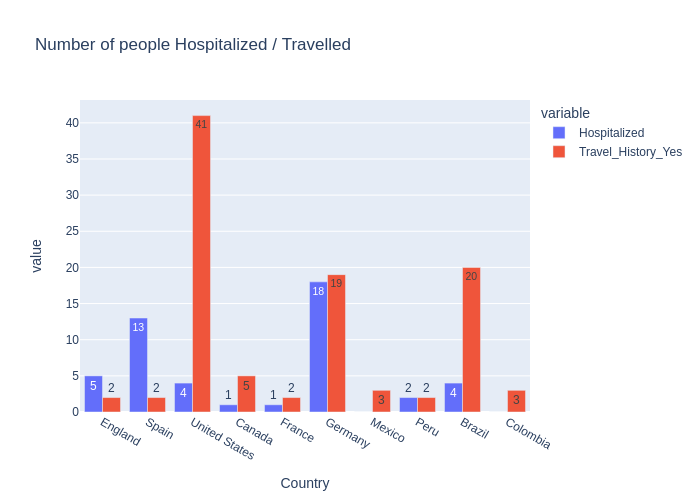

In [19]:
fig = hospitalized_and_travelled(df_worldwide_cases)
fig.show("png")

6. Symptoms

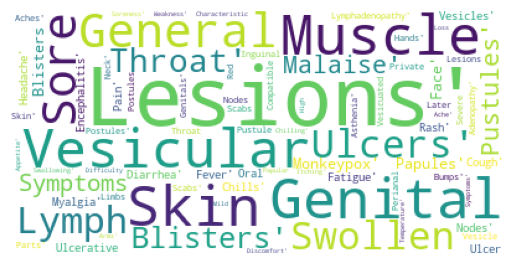

In [20]:
fig = symptoms_word_cloud(df_detection_timeline)
fig.show()

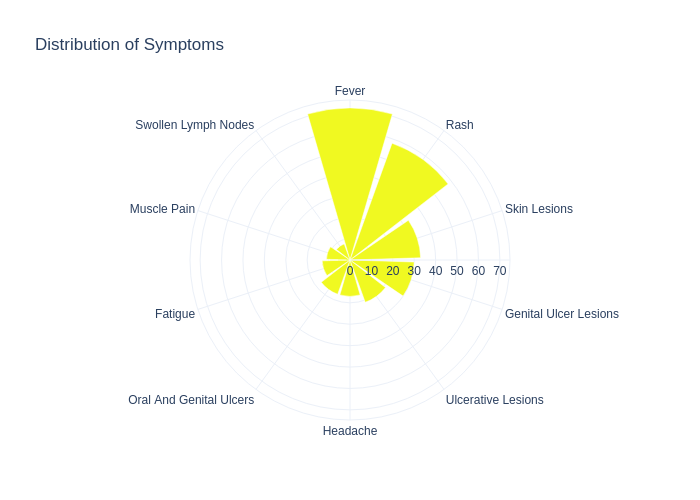

In [21]:
fig = symptoms_distribution(df_detection_timeline)
fig.show("png")

It is evident that the most common symptoms are all skin lesions or rashes, which is the main way for monkeypox to spread

7. Correlation of various features

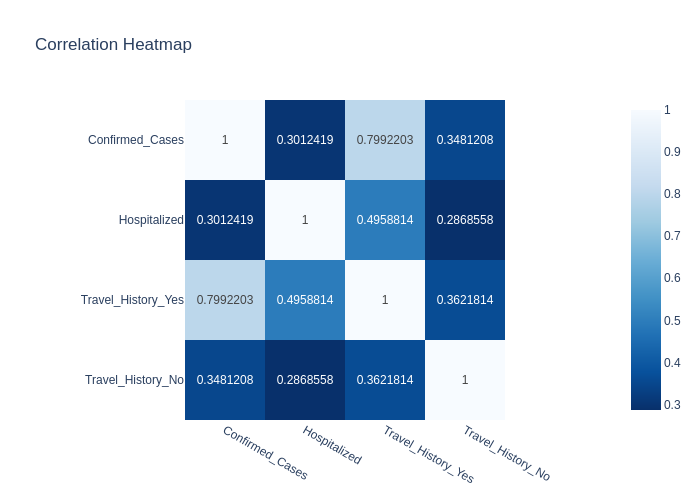

In [22]:
fig = correlation_heatmap(df_worldwide_cases)
fig.show("png")

We can see that the confirmed cases have a very high correlation with travel history, which is indicative of the fact the disease has spread all across the world because people travelled from one place to another. The correlation with hospitalization is the direct result of causation as only confirmed cases will be hospitalized.

<font size="4"><b>Analysis of how various attributes affect hospitalization</font></b><br>
1.__Hospitalization of people based on genders__: We can observe that majority of hospitalization occured in males

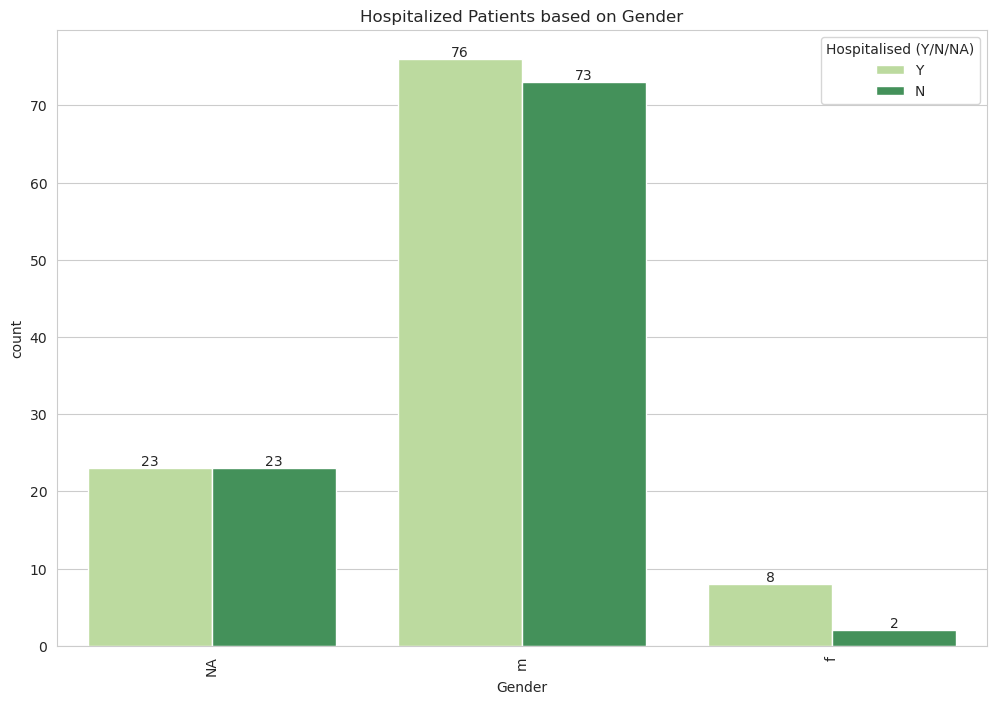

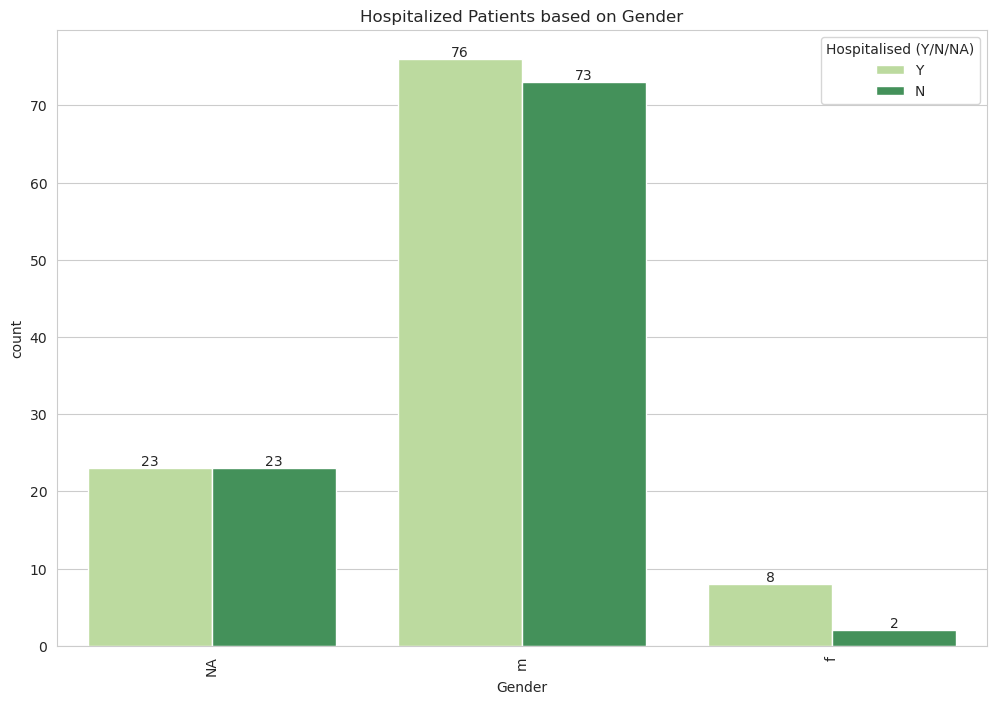

In [23]:
hospitalization_gender(df_detection_timeline)

__2.Virus deteteced people based on Age group__: We can observe that majority of virus was detected in people in there 40s

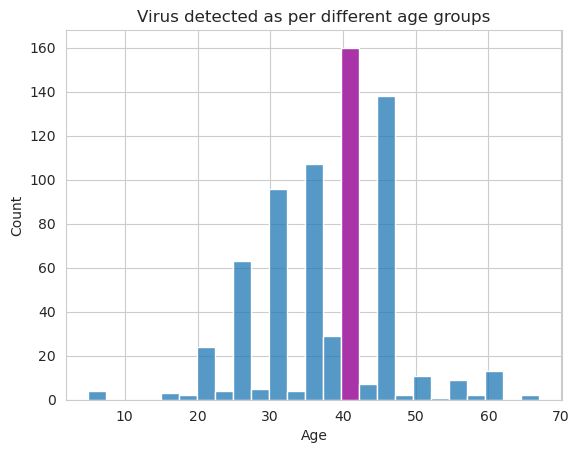

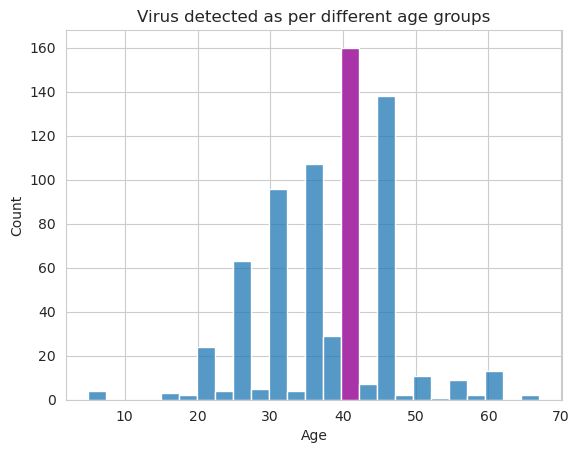

In [24]:
virus_vs_age_group(df_detection_timeline)

3.__Hospitalization of people based on genders__: We can observe that majority of hospitalization occured people in there 30s

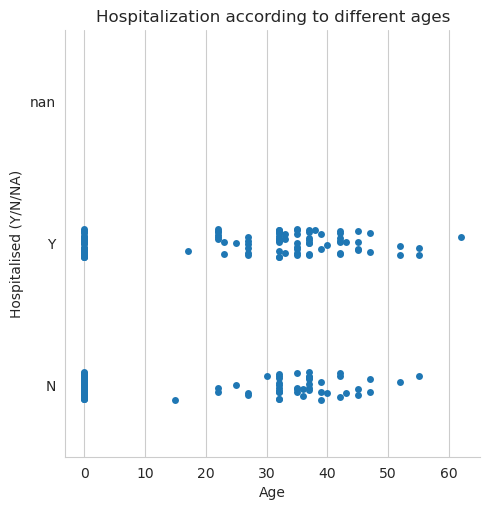

In [25]:
hospitalization_vs_age(df_detection_timeline)

4.__Hospitalization of based on symptoms__: We can observe that majority of hospitalization occured due to rashes,fever 
                                            and lesion symptoms in people

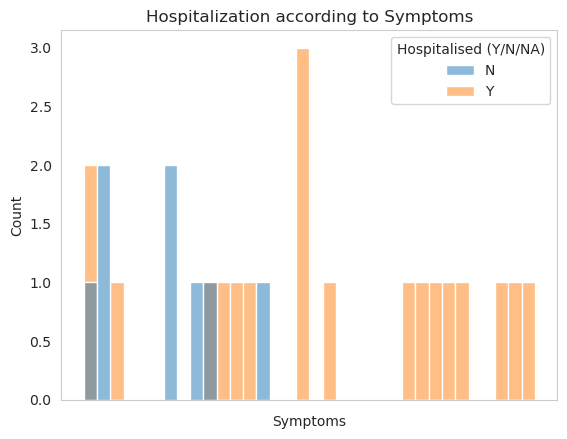

In [27]:
fig = hospitalization_symptoms(df_detection_timeline)

__US vs World__

It is evident that the US has the highest number of cases. We want to compare how the confirmed cases and other statistics change for the US when compared to the world

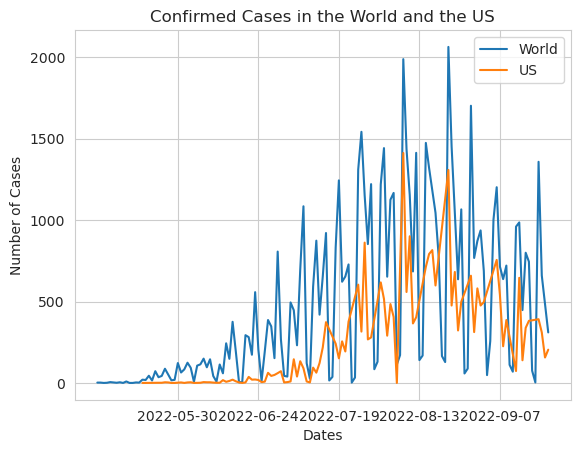

In [63]:
fig = US_world_timeline(df_detection_timeline)
fig.show()

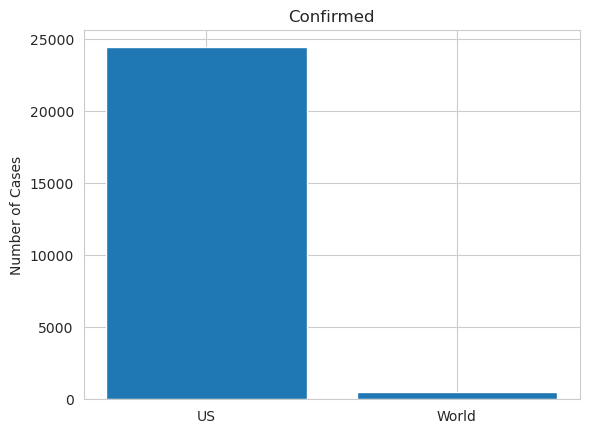

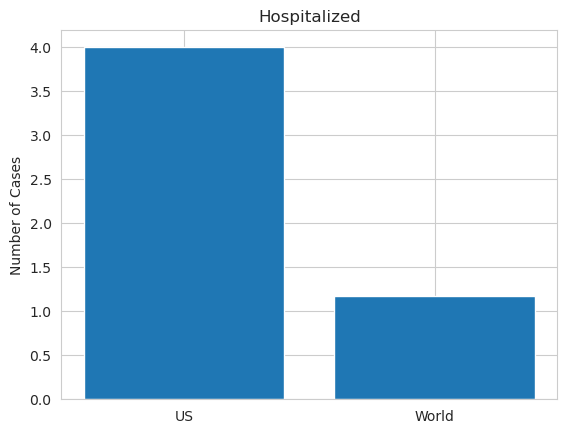

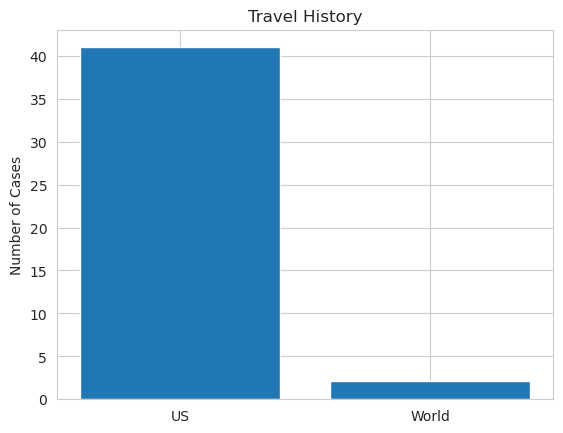

In [64]:
conf_fig, hosp_fig, trav_fig = US_world_histogram(df_worldwide_cases)
conf_fig.show()
hosp_fig.show()
trav_fig.show()